In [6]:
# Data Observation
import pandas as pd
import numpy as np

all_time_plays = pd.read_csv("nflpbp2021.csv")
print(len(all_time_plays))
all_time_plays.head(10)

42795


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2021092612,2021-09-26,1,9,10,MIN,SEA,1,10,57,...,0,0,NaN,43,OPP,0,NaN,0,NaN,0
1,2021092612,2021-09-26,1,8,32,MIN,SEA,1,10,74,...,0,0,NaN,26,OPP,0,NaN,0,NaN,0
2,2021092612,2021-09-26,1,7,52,MIN,SEA,2,2,82,...,0,0,NaN,18,OPP,0,NaN,0,NaN,0
3,2021092612,2021-09-26,1,7,13,MIN,SEA,1,8,92,...,0,0,CENTER,8,OPP,0,NaN,0,NaN,0
4,2021101008,2021-10-10,1,9,50,WAS,NO,2,2,51,...,0,0,LEFT TACKLE,49,OPP,0,NaN,0,NaN,0
5,2021101008,2021-10-10,1,9,11,WAS,NO,1,10,54,...,0,0,NaN,46,OPP,0,NaN,0,NaN,0
6,2021101706,2021-10-17,3,1,19,LA,NYG,2,7,54,...,0,0,NaN,46,OPP,0,NaN,0,NaN,0
7,2021102405,2021-10-24,4,9,34,KC,TEN,4,8,58,...,0,0,NaN,42,OPP,0,NaN,0,NaN,0
8,2021103101,2021-10-31,4,4,53,BUF,MIA,1,10,77,...,0,0,RIGHT TACKLE,23,OPP,0,NaN,0,NaN,0
9,2021102406,2021-10-24,2,3,38,LA,DET,2,9,80,...,0,0,NaN,20,OPP,1,LA,1,FALSE START,5


In [7]:
#How many NaN values are there?
all_time_plays.isna().sum()

GameId                                0
GameDate                              0
Quarter                               0
Minute                                0
Second                                0
OffenseTeam                        3688
DefenseTeam                        3688
Down                                  0
ToGo                                  0
YardLine                              0
Unnamed: 10                       42795
SeriesFirstDown                       0
Unnamed: 12                       42795
NextScore                             0
Description                           0
TeamWin                               0
Unnamed: 16                       42795
Unnamed: 17                       42795
SeasonYear                            0
Yards                                 0
Formation                           978
PlayType                           1953
IsRush                                0
IsPass                                0
IsIncomplete                          0


In [8]:
# Data Preprocessing: Dropping and Trimming NaN values

# Dropping it like it's hot [vine boom]
all_time_plays.dropna(inplace=True, axis=1, how='all') #dropping empty rows
all_time_plays = all_time_plays.drop(all_time_plays[all_time_plays.IsNoPlay == 1].index) # getting rid of rows where there is no play occurring 
all_time_plays = all_time_plays.dropna(subset=['OffenseTeam','PlayType']) # getting rid of rows where there are no teams playing
print(len(all_time_plays))

# Trimming our Data
keep_list = ['Quarter','Minute','Second','OffenseTeam','DefenseTeam','Down',
             'ToGo','YardLine','SeriesFirstDown','Formation','PlayType','IsSack',
             'IsInterception','IsFumble', 'IsPenalty','YardLineDirection','PenaltyYards']
all_time_plays = all_time_plays[keep_list]

# How does our Data look now?
all_time_plays.isna().sum()


36785


Quarter              0
Minute               0
Second               0
OffenseTeam          0
DefenseTeam          0
Down                 0
ToGo                 0
YardLine             0
SeriesFirstDown      0
Formation            0
PlayType             0
IsSack               0
IsInterception       0
IsFumble             0
IsPenalty            0
YardLineDirection    0
PenaltyYards         0
dtype: int64

In [9]:
# Data Preprocessing: Encoding Categorical Values

#one hot encoding
print(all_time_plays['Formation'].unique())
print(all_time_plays['YardLineDirection'].unique())

onehotform = pd.get_dummies(all_time_plays['Formation'])
onehotdir = pd.get_dummies(all_time_plays['YardLineDirection'])

addon = onehotform.join(onehotdir)

all_time_plays = all_time_plays.drop(['Formation', 'YardLineDirection'],axis = 1)

all_time_plays = all_time_plays.join(addon)

all_time_plays.head()

# teamdict = dict(enumerate(all_time_plays['OffenseTeam'].unique()))
# teamdict = {value:key for key, value in teamdict.items()}
# all_time_plays['OffenseTeam'] = all_time_plays['OffenseTeam'].map(teamdict)
# all_time_plays['DefenseTeam'] = all_time_plays['DefenseTeam'].map(teamdict)

# all_time_plays.head(10)


['UNDER CENTER' 'SHOTGUN' 'NO HUDDLE SHOTGUN' 'NO HUDDLE' 'PUNT'
 'FIELD GOAL']
['OPP' 'OWN']


,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,PlayType,...,IsPenalty,PenaltyYards,FIELD GOAL,NO HUDDLE,NO HUDDLE SHOTGUN,PUNT,SHOTGUN,UNDER CENTER,OPP,OWN
0,1,9,10,MIN,SEA,1,10,57,1,PASS,...,0,0,0,0,0,0,0,1,1,0
1,1,8,32,MIN,SEA,1,10,74,0,PASS,...,0,0,0,0,0,0,0,1,1,0
2,1,7,52,MIN,SEA,2,2,82,1,PASS,...,0,0,0,0,0,0,1,0,1,0
3,1,7,13,MIN,SEA,1,8,92,0,RUSH,...,0,0,0,0,0,0,1,0,1,0
4,1,9,50,WAS,NO,2,2,51,1,RUSH,...,0,0,0,0,0,0,1,0,1,0


In [10]:
# Data Preprocessing: Encoding Large Categorical Values
print(all_time_plays['OffenseTeam'].unique())
print(all_time_plays['PlayType'].unique())

#count frequency encoding
freq_dict = all_time_plays['OffenseTeam'].value_counts().to_dict()
pfreq_dict = all_time_plays['PlayType'].value_counts().to_dict()
all_time_plays['OffenseTeam'] = all_time_plays['OffenseTeam'].map(freq_dict)
all_time_plays['DefenseTeam'] = all_time_plays['DefenseTeam'].map(freq_dict)
all_time_plays['PlayType'] = all_time_plays['PlayType'].map(pfreq_dict)


['MIN' 'WAS' 'LA' 'KC' 'BUF' 'ARI' 'PIT' 'SF' 'PHI' 'TEN' 'NO' 'LAC' 'CHI'
 'DAL' 'LV' 'TB' 'NYG' 'MIA' 'NYJ' 'DET' 'JAX' 'HOU' 'ATL' 'DEN' 'SEA'
 'CLE' 'CAR' 'NE' 'GB' 'IND' 'BAL' 'CIN']
['PASS' 'RUSH' 'SCRAMBLE' 'QB KNEEL' 'SACK' 'EXTRA POINT' 'PUNT'
 'CLOCK STOP' 'FIELD GOAL' 'FUMBLES' 'TWO-POINT CONVERSION' 'EXCEPTION'
 'KICK OFF' 'PENALTY']


In [20]:
#Preparing to Train(choo choooo)

from sklearn.model_selection import train_test_split
#splitting the data into our X and Ys (separating features)
X = all_time_plays.drop('SeriesFirstDown',axis=1)
y = all_time_plays['SeriesFirstDown']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.5, random_state=21
)

#Do the shapes match?
print(X_test.shape)
print(X_train.shape)


(18393, 22)
(18392, 22)


In [22]:
# Data Preprocessing: Standardizing our Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Does it look right?
X_train_scaled[:5]

array([[ 0.38779399, -0.79742038, -1.40084571,  2.22937921,  0.29853473,
        -0.70151006,  0.49528655,  1.0559827 ,  0.00783313, -0.17507954,
        -0.10052586, -0.12433569, -0.16819715, -0.12831106, -0.1572836 ,
        -0.12767554, -0.27885749, -0.22762443, -0.9389007 ,  1.30518702,
         1.11229377, -1.11229377],
       [-0.49864736,  1.37821202, -1.34464822,  0.58350972,  0.07438842,
         1.09307551, -1.20973865,  0.49998731,  0.87515789, -0.17507954,
        -0.10052586, -0.12433569, -0.16819715, -0.12831106, -0.1572836 ,
        -0.12767554, -0.27885749, -0.22762443,  1.06507536, -0.76617372,
         1.11229377, -1.11229377],
       [-1.38508872, -0.57985714,  1.63381837,  0.99497709,  0.50400218,
        -0.70151006,  0.49528655,  0.61912918,  0.87515789, -0.17507954,
        -0.10052586, -0.12433569, -0.16819715, -0.12831106, -0.1572836 ,
        -0.12767554, -0.27885749, -0.22762443, -0.9389007 ,  1.30518702,
         1.11229377, -1.11229377],
       [-1.38508872

In [28]:
import tensorflow as tf
tf.random.set_seed(21)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # we have one binary output node
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy, # our loss function
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
575/575 [==============================] - 3s 4ms/step - loss: 0.4967 - accuracy: 0.7667 - precision: 0.7848 - recall: 0.4206
Epoch 2/100
575/575 [==============================] - 2s 3ms/step - loss: 0.4477 - accuracy: 0.7705 - precision: 0.8445 - recall: 0.3879
Epoch 3/100
575/575 [==============================] - 2s 3ms/step - loss: 0.4375 - accuracy: 0.7741 - precision: 0.7948 - recall: 0.4410
Epoch 4/100
575/575 [==============================] - 2s 3ms/step - loss: 0.5345 - accuracy: 0.7443 - precision: 0.7532 - recall: 0.3548
Epoch 5/100
575/575 [==============================] - 2s 3ms/step - loss: 0.5622 - accuracy: 0.7075 - precision: 0.8508 - recall: 0.1561
Epoch 6/100
575/575 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7409 - precision: 0.7899 - recall: 0.3111
Epoch 7/100
575/575 [==============================] - 2s 3ms/step - loss: 0.4990 - accuracy: 0.7544 - precision: 0.9540 - recall: 0.2821
Epoch 8/100
575/575 [=============

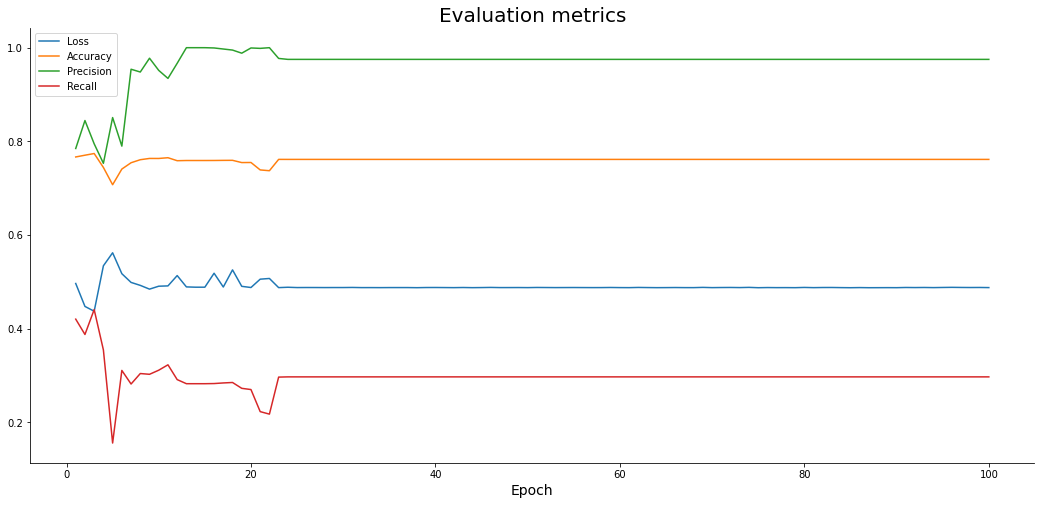

In [29]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, 101), history.history['loss'], label='Loss')
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, 101), history.history['precision'], label='Precision')
plt.plot(np.arange(1, 101), history.history['recall'], label='Recall')
plt.title('Model Evaluation Metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [36]:
predictions = model.predict(X_test_scaled)
#predictions are probabilities, we need to put it into classes to get meaningful data our threshold is 0.5
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print(prediction_classes[:20])
# is this strange?

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [33]:
loss, accuracy, precision, recall = model.evaluate(X_test_scaled, y_test)
loss, accuracy, precision, recall

575/575 [==============================] - 2s 3ms/step - loss: 0.5579 - accuracy: 0.7621 - precision: 0.9726 - recall: 0.3035


(0.5578792691230774,
 0.762137770652771,
 0.9726239442825317,
 0.30346494913101196)

In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[12135    53]
 [ 4322  1883]]


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy:  {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall:    {recall_score(y_test, prediction_classes):.2f}')

Accuracy:  0.76
Precision: 0.97
Recall:    0.30


In [46]:
#saving your model for later
!mkdir -p saved_model
model.save('saved_model/my_model') 
#making it so we can take it out
! zip -r /content/saved_model/my_model.zip . /content/saved_model/my_model
#How to load your model: 
model = tf.keras.models.load_model('saved_model/my_model')

  adding: .config/ (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/active_config (stored 0%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2022.10.05/ (stored 0%)
  adding: .config/logs/2022.10.05/13.34.09.819109.log (deflated 91%)
  adding: .config/logs/2022.10.05/13.34.36.122414.log (deflated 54%)
  adding: .config/logs/2022.10.05/13.35.31.695201.log (deflated 53%)
  adding: .config/logs/2022.10.05/13.35.07.796466.log (deflated 53%)
  adding: .config/logs/2022.10.05/13.34.58.544678.log (deflated 86%)
  adding: .config/logs/2022.10.05/13.35.30.920507.log (deflated 55%)
  adding: saved_model/ (stored 0%)
  adding: saved_model/my_model/ (stor